In [2]:
import numpy as np
from scipy import special as sp
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
test_data = np.genfromtxt('demo-data.csv', 
                          delimiter=',',
                          dtype='int',
                          names=True)

In [42]:
def simulate_data(success_rate, n_periods, n_per_low, n_per_high):
    """Simulates observations of (converted, not_converted) data based on the success_rate
    for N_periods, with a number of trials per period between N_per_low and N_per_high"""
    result = []
    for i in range(n_periods):
        num_trials = np.random.randint(n_per_low, n_per_high)
        num_successes = np.random.binomial(num_trials, success_rate, 1)[0]
        num_failures = num_trials - num_successes
        result.append((num_successes, num_failures))
    return result

In [44]:
def add_ones(a_control, B_control, a_test, B_test):
    """Adds one to all input parameters"""
    a_control += 1
    B_control += 1
    a_test += 1
    B_test += 1
    return a_control, B_control, a_test, B_test

In [49]:
#source: http://www.evanmiller.org/bayesian-ab-testing.html
def probability_test_wins(a_control, B_control, a_test, B_test):
    """Uses beta distribution to compute the % chance that _test has a better conversion 
    rate than _control"""
    a_control, B_control, a_test, B_test = add_ones(a_control, B_control, a_test, B_test)
    total = 0.0
    for i in range(0, a_test - 1):
        total += np.exp(
                          sp.betaln(a_control + i, B_control + B_test) 
                        - np.log(B_test + i)
                        - sp.betaln(1 + i, B_test) 
                        - sp.betaln(a_control, B_control)
                       )
    return total

In [81]:
test_success_rate = 0.16
control_success_rate = 0.15
N = 100
N_per_low = 80
N_per_high = 100

test_data = simulate_data(success_rate=test_success_rate, 
                          n_periods=N, 
                          n_per_low=N_per_low, 
                          n_per_high=N_per_high)

control_data = simulate_data(success_rate=control_success_rate, 
                             n_periods=N, 
                             n_per_low=N_per_low, 
                             n_per_high=N_per_high)

N = len(test_data)
results = [0.00 for i in range(N)]

In [82]:
test_success_cum, test_failure_cum, control_success_cum, control_failure_cum = 0, 0, 0, 0
for i in range(len(results)):
    test_success = test_data[i][0]
    test_failure = test_data[i][1]
    control_success = control_data[i][0]
    control_failure = control_data[i][1]
    
    test_success_cum += test_success
    test_failure_cum += test_failure
    control_success_cum += control_success
    control_failure_cum += control_failure
    
    result = probability_test_wins(a_control=control_success_cum, 
                                   B_control=control_failure_cum,
                                   a_test=test_success_cum, 
                                   B_test=test_failure_cum)
    
    results[i] = result

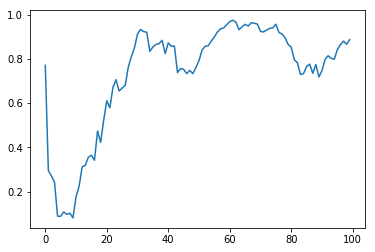

In [83]:
plt.plot(results)